In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
os.chdir(r'C:\Users\Casper\Desktop/Traffic')
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

data = []
labels = []
classes = 43
cur_path = os.getcwd()

#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)







(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [2]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/20
981/981 [==============================] - 169s 130ms/step - loss: 3.1324 - accuracy: 0.3295 - val_loss: 0.4348 - val_accuracy: 0.8766
Epoch 2/20
981/981 [==============================] - 124s 126ms/step - loss: 0.7228 - accuracy: 0.7881 - val_loss: 0.1942 - val_accuracy: 0.9459
Epoch 3/20
981/981 [==============================] - 134s 137ms/step - loss: 0.4718 - accuracy: 0.8604 - val_loss: 0.1576 - val_accuracy: 0.9603
Epoch 4/20
981/981 [==============================] - 127s 130ms/step - loss: 0.4362 - accuracy: 0.8744 - val_loss: 0.1065 - val_accuracy: 0.9716
Epoch 5/20
981/981 [==============================] - 127s 129ms/step - loss: 0.3601 - accuracy: 0.8951 - val_loss: 0.0900 - val_accuracy: 0.9741
Epoch 6/20
981/981 [==============================] - 126s 129ms/step - loss: 0.3111 - accuracy: 0.9068 - val_loss: 0.0628 - val_accuracy: 0.9818
Epoch 7/20
981/981 [==============================] - 126s 129ms/step - loss: 0.2978 - accuracy: 0.9143 - val_loss: 0.0813 -

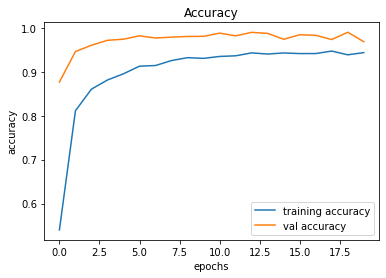

In [9]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

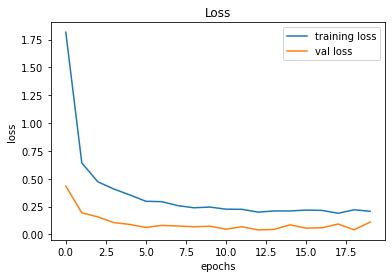

In [10]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [2]:
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

0.9685669041963578


In [6]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred = model.predict_classes(X_test)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

model.save("traffic_classifier.h5")

C:\Users\Casper\anaconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [8]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

import numpy
#load the trained model to classify sign
from keras.models import load_model
model = load_model('traffic_classifier.h5')

#dictionary to label all traffic signs class.
classes = {  1:'Hız sınırı (20km/s)',
             2:'Hız sınırı (30km/s)',
             3:'Hız sınırı (50km/s)',
             4:'Hız sınırı (60km/s)',
             5:'Hız sınırı (70km/s)',
             6:'Hız sınırı (80km/s)',
             7:'Hız sınırının sonu (80km/s)',
             8:'Hız sınırı (100km/s)',
             9:'Hız sınırı (120km/s)',
             10:'Geçiş yok/Öndeki taşıtı geçmek yasaktır ',
             11:'3,5 tonu geçen araç geçilmez',
             12:'Kavşakta geçiş hakkı',
             13:'Anayol',
             14:'Yol Ver',
             15:'Dur',
             16:'Araç Giremez',
             17:'3,5 ton üzeri araçların öndeki aracı geçmesi yasaktır',
             18:'Giriş yok',
             19:'Dikkat',
             20:'Sola tehlikeli viraj',
             21:'Sağa tehlikeli viraj',
             22:'Sola tehlikeli devamlı virajlar',
             23:'Engebeli yol',
             24:'Kaygan yol',
             25:'Yol sağdan daralıyor',
             26:'Yol çalışması',
             27:'Trafik sinyalleri',
             28:'Yaya Geçidi',
             29:'Okul Geçiti',
             30:'Bisiklet geçiti',
             31:'Buz/kardan sakının',
             32:'Vahşi hayvan çıkabilir',
             33:'Bitiş hızı + geçiş limitleri',
             34:'Sağa dönüş',
             35:'Sola dönüş',
             36:'Zorunlu yön',
             37:'Düz veya sağa gidin',
             38:'Düz veya sola gidin',
             39:'Sağa mecburi yön',
             40:'Sola mecburi yön',
             41:'Mecburi dönel kavşak',
             42:'Geçiş yok sonu',
             43:'Geçişsiz araç > 3,5 ton'}
#initialise GUI
top=tk.Tk()
top.geometry('800x600')
top.title('Traffic sign classification')
top.configure(background='#CDCDCD')

label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)

def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    pred = model.predict_classes([image])[0]
    sign = classes[pred+1]
    print(sign)
    label.configure(foreground='#011638', text=sign) 

def show_classify_button(file_path):
    classify_b=Button(top,text="Sınıflandır",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)

def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)

        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

upload=Button(top,text="Yukle",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))

upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Trafik İsaretlerini Tanıma",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()


Hız sınırı (120km/s)
Vahşi hayvan çıkabilir
Hız sınırı (80km/s)
Dikkat
Okul Geçiti
Yol çalışması
Hız sınırı (50km/s)
